**Step -1 : Import data science libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

**Step -2: Load dataset**

load that using pandas

In [2]:
dataset = pd.read_csv('./dataset/LR_NonLinear.csv')
dataset.head()

,x1,x2,class
0,-0.023733,0.62456,1
1,-0.167742,0.60994,1
2,-0.288710,0.61725,1
3,-0.450000,0.42719,1
4,-0.588250,0.39064,1


*Check for missing values*

dataset.info()

In [3]:
print(dataset.keys())
print(dataset.info())

Index(['x1', 'x2', 'class'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 3 columns):
x1       236 non-null float64
x2       236 non-null float64
class    236 non-null int64
dtypes: float64(2), int64(1)
memory usage: 5.6 KB
None


**If possible visualize**

**Method -2:**

In [5]:
X = dataset.iloc[:,0:-1].values # independent variable
y = dataset.iloc[:,-1].values # dependent variable


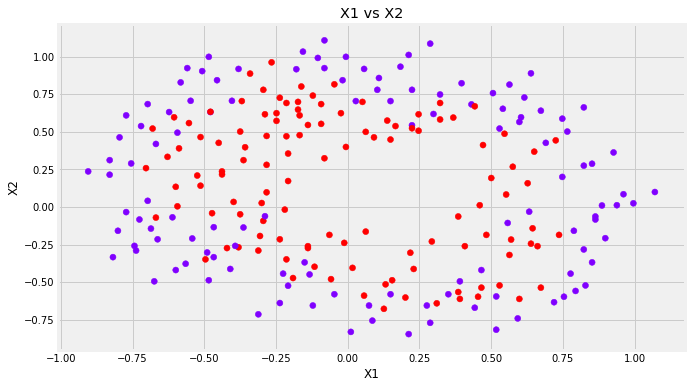

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c= y, cmap = 'rainbow')
plt.xlabel('X1')
plt.ylabel('X2')
#plt.legend(['class0','class1'])
plt.title('X1 vs X2')
plt.show()

**Step -3: Splitting Data**
- training
- testing

In [14]:
from sklearn.cross_validation import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = 0.8)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((188, 2), (48, 2), (188,), (48,))

**Step - 4: Building Machine Learning Model -> classification**

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model_logits = LogisticRegression(C = 10.0) # Logistic regression model --> probabitliy score

**Step - 5: *Traning* **

In [22]:
model_logits.fit(x_train,y_train) # Logistic regression

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
y_pred_logits = model_logits.predict(x_test)
y_prob_logits = model_logits.predict_proba(x_test)

**Step - 6: Model Evaluation**

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
cm = confusion_matrix(y_test, y_pred_logits)
cr = classification_report(y_test, y_pred_logits)

In [27]:
import seaborn as sns

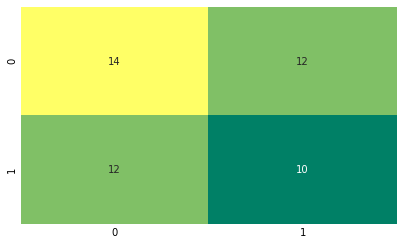

In [35]:
sns.heatmap(cm,cmap = 'summer',annot=True, cbar= False)
plt.show()

In [34]:
print(cr)

             precision    recall  f1-score   support

          0       0.54      0.54      0.54        26
          1       0.45      0.45      0.45        22

avg / total       0.50      0.50      0.50        48



Logistic Regression probability score: [0.13847227 0.28296057 0.4920983  0.70403866 0.85381209 0.93480969
 0.97238106 0.98856369 0.99531024]


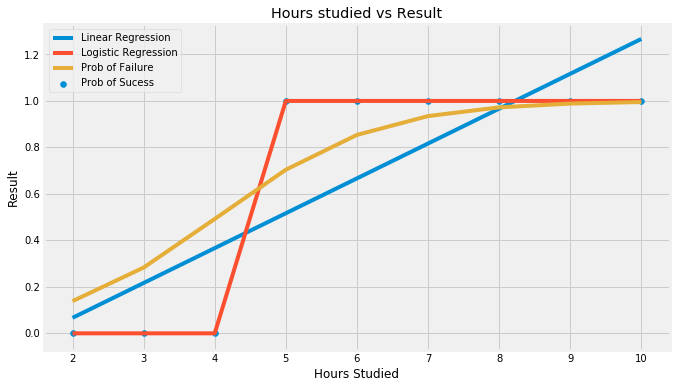

In [37]:
print('Logistic Regression probability score:', y_prob_logits[:,1])
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred_linear)
plt.plot(X,y_pred_logits)
plt.plot(X,y_prob_logits[:,1])
plt.xlabel('Hours Studied')
plt.ylabel('Result')
plt.title('Hours studied vs Result')
plt.legend(['Linear Regression','Logistic Regression','Prob of Failure','Prob of Sucess'])
plt.show()

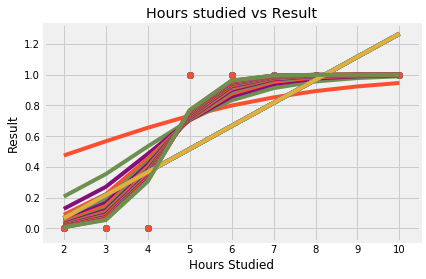

In [40]:
for i in range(1,100, 5):
    model = LogisticRegression(C = i)
    model.fit(X,y)
    y_prob = model.predict_proba(X)

    plt.scatter(X,y)
    plt.plot(X,y_pred_linear)
    plt.plot(X,y_prob[:,1])
    plt.xlabel('Hours Studied')
    plt.ylabel('Result')
    plt.title('Hours studied vs Result')

plt.show()